<a href="https://colab.research.google.com/github/nireasir/auth-dws-ml2526/blob/main/MLex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

# Ερώτημα 1

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Ερώτημα 2

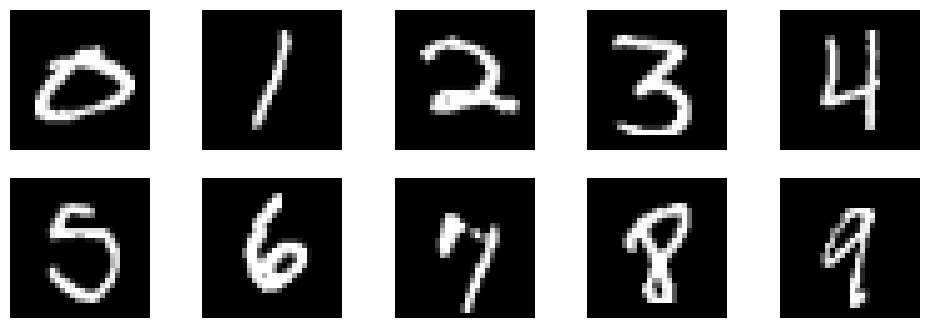

In [3]:
plt.figure(figsize=(12,4))
for digit in range(10):
  ind=np.where(y_train==digit)[0]
  rand_idx=np.random.choice(ind)
  img=x_train[rand_idx]
  plt.subplot(2, 5, digit + 1)
  plt.imshow(img, cmap="gray")
  plt.axis("off")
plt.show()


# Ερώτημα 3

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Το μέγεθος κάθε εικόνας είναι 28x28.Δε θεωρώ ότι είναι όλα τα pixels εξίσου σημαντικά καθώς μόνο τα pixels που σχηματίζουν το νούμερο μας μεταφέρουν πληροφορία για το ποιο ψηφίο είναι και άρα χρήσιμα για το train. Τα άλλα pixels που χρησιμοποιούνται για τον φόντο δεν είναι το ίδιο σημαντικά.

# Ερώτημα 4

In [5]:
x_train_vecs = x_train.reshape((x_train.shape[0], 28*28))
x_test_vecs = x_test.reshape((x_test.shape[0], 28*28))
print(x_train_vecs.shape,x_test_vecs.shape)


(60000, 784) (10000, 784)


# Ερώτημα 5

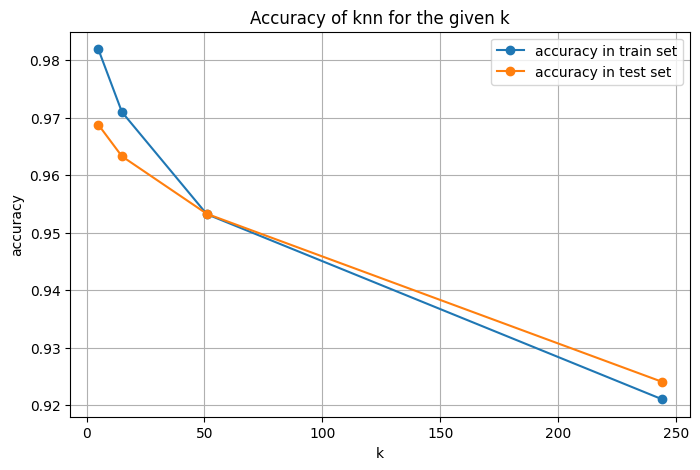

In [9]:
k_values=[5,15,51,int(np.sqrt(x_train_vecs.shape[0]))]
tr_accs=[]
tes_accs=[]
for k in k_values:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train_vecs,y_train)
  y_pred=model.predict(x_train_vecs)
  accuracy=accuracy_score(y_train,y_pred)
  tr_accs.append(accuracy)
  y_pred=model.predict(x_test_vecs)
  accuracy=accuracy_score(y_test,y_pred)
  tes_accs.append(accuracy)
plt.figure(figsize=(8,5))
plt.plot(k_values, tr_accs, marker='o', label='accuracy in train set')
plt.plot(k_values, tes_accs, marker='o', label='accuracy in test set')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Accuracy of knn for the given k")
plt.legend()
plt.grid(True)
plt.show()

# Ερώτημα 6

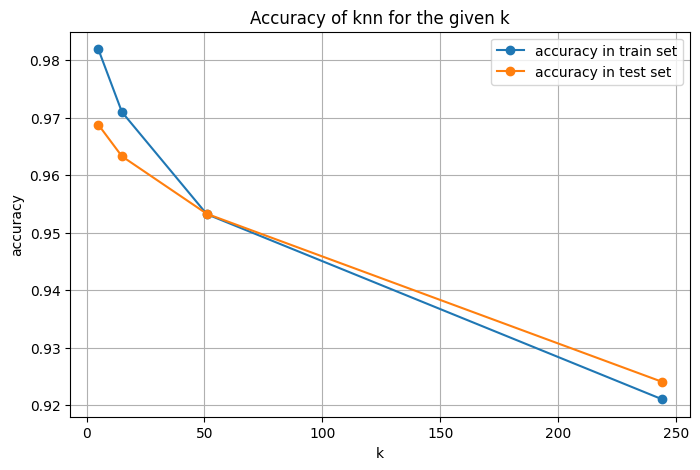

In [10]:
x_train_vecs=x_train_vecs.astype("float32")/255
x_test_vecs=x_test_vecs.astype("float32")/255
k_values=[5,15,51,int(np.sqrt(x_train_vecs.shape[0]))]
tr_accs=[]
tes_accs=[]
for k in k_values:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train_vecs,y_train)
  y_pred=model.predict(x_train_vecs)
  accuracy=accuracy_score(y_train,y_pred)
  tr_accs.append(accuracy)
  y_pred=model.predict(x_test_vecs)
  accuracy=accuracy_score(y_test,y_pred)
  tes_accs.append(accuracy)
plt.figure(figsize=(8,5))
plt.plot(k_values, tr_accs, marker='o', label='accuracy in train set')
plt.plot(k_values, tes_accs, marker='o', label='accuracy in test set')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Accuracy of knn for the given k")
plt.legend()
plt.grid(True)
plt.show()

Παρατηρούμε ότι τα αποτελέσματα των ερωτημάτων 5 και 6 είναι ίδια. Αυτό συμβαίνει διότι ο K-nn δεν επηρεάζεται από την κανονικοποίηση των τιμών στο [0,1], διότι οι αποστάσεις παραμένουν ίδιες.

# Ερώτημα 7

In [18]:
image=Image.open("efta.png").convert("L").resize((28,28))
image_array=np.array(image).astype("float32")/255.0
image_vec=image_array.reshape(1,28*28)
bestknn=KNeighborsClassifier(n_neighbors=5)
bestknn.fit(x_train_vecs,y_train)
y_pred=bestknn.predict(image_vec)
print(y_pred[0])


1


Ζωγραφίστηκε το ψηφίο 7. Το καλύτερο μοντέλο με βάση τα αποτελέσματα των προηγούμενων ερωτημάτων είναι για k=5. Παρατηρούμε ότι το μοντέλο δε ταξινομεί σωστά το ψηφίο 7 καθώς το αποτέλεσμα είναι 1.